In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
def load_data(path):
    """
    Loads data into dataframe
    :param path: a full path to the file
    :return: dataframe
    """
    raw_data = pd.read_csv(path, sep=';')
    df = raw_data.copy()
    dtypes = {col: float for col in df.columns}
    data = pd.read_csv(path, dtype=dtypes, sep=';')
    df = data.copy()
    return df
df = load_data(r'D:\MAI\ANN\Project\winequality_data(1)\winequality-white.csv')

In [3]:
usable = df[(df['quality'] == 6) | (df['quality'] == 7)]
def scale_data(df, scaler=preprocessing.StandardScaler()):
    """
    scales the dataframe using the scaler from sklearn library.
    :param df: dataframe
    :param scaler: one of the scaling methods available in sklearn.preprocessing in for preprocessing.Scaler(). 
    Possible values: preprocessing.RobustScaler(), preprocessing.MaxAbsScaler(), preprocessing.MinMaxScaler(), preprocessing.StandardScaler()
    :return: scaled dataframe
    """
    features = df.copy().drop('quality', axis=1)
    target = df.copy()[['quality']]
    df_internal = pd.DataFrame(scaler.fit_transform(features), columns=features.columns, index=features.index)
    df_out = pd.concat([df_internal, target], axis=1)  
    return df_out
usable2 = scale_data(usable)

In [4]:
len(usable2[usable2['quality'] == 6])/len(usable2)

0.714100064977258

In [5]:
train = usable2[:usable2.shape[0]*9//10]
validate = usable2[usable2.shape[0]*9//10:]
features = train.copy().drop('quality', axis=1)
target = train.copy()[['quality']]
features_validate = validate.copy().drop('quality', axis=1)
target_validate = validate.copy()[['quality']]

In [7]:
mlp = MLPClassifier(verbose=0, random_state=0, max_iter=10000)
mlp.fit(features, target.values.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=0,
       warm_start=False)

In [8]:
prediction = mlp.predict(features_validate)

In [9]:
conf_matrix = confusion_matrix(target_validate, prediction)

In [10]:
conf_matrix

array([[187,  49],
       [ 50,  22]])

In [11]:
CCR = accuracy_score(target_validate, prediction)*100
CCR

67.857142857142861

In [12]:
layer_sizes = []
for x in range(1, 4):
    for y in range(70, 151, 20):
        layer_sizes.append((y, x))

In [194]:
parameters = [{'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'],
              'early_stopping': [True, False], 'hidden_layer_sizes': layer_sizes}]
clf = GridSearchCV(mlp, parameters, scoring='accuracy')
clf.fit(features, target.values.ravel())

GridSearchCV(cv=None, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=0,
       warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'], 'early_stopping': [True, False], 'hidden_layer_sizes': [(70, 1), (90, 1), (110, 1), (130, 1), (150, 1), (70, 2), (90, 2), (110, 2), (130, 2), (150, 2), (70, 3), (90, 3), (110, 3), (130, 3), (150, 3)]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [195]:
print(clf.best_params_)

{'activation': 'logistic', 'early_stopping': False, 'hidden_layer_sizes': (70, 2), 'solver': 'adam'}


In [42]:
mlp = MLPClassifier(verbose=0, random_state=0, max_iter=10000, hidden_layer_sizes=(70,2), activation='logistic')
mlp.fit(features, target.values.ravel())

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(70, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=0,
       warm_start=False)

In [43]:
prediction = mlp.predict(features_validate)
CCR = accuracy_score(target_validate, prediction)*100
CCR

73.701298701298697

In [44]:
conf_matrix = confusion_matrix(target_validate, prediction)
conf_matrix

array([[201,  35],
       [ 46,  26]])

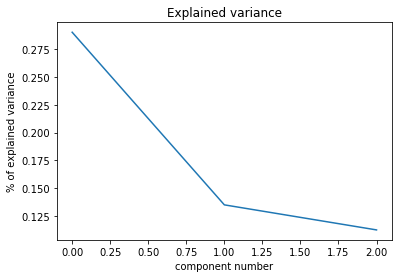

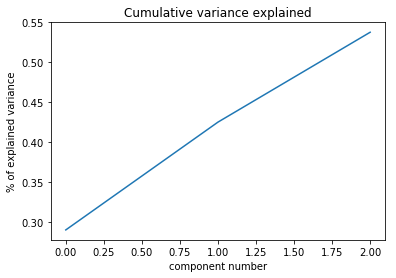

3 0.537693103008


In [90]:
def principal_comp_analysis(df, n=1.0, k=None, explained_variance=None, plot_variance=False, plot_loadings=False, plot_total_variance=False):
    """
    Does PCA on a dataframe with number of components chosen such that all used components explain at least n variance each.
    Default option.
    Alternatively, one can specify the number of components manually.
    Alternatively, one can specify the total varaince that must be explained by principal components
    Explicit specification of number of components takes precedence over explained variance,
    which takes precedence over n variance explained by one component.
    Specify ONLY one of (n,k,explained_variance).
    :param df: dataframe
    :param n: float, minimum variance that is explained by each principal component.
    :param k: int, number of kept principal components.
    :param explained_variance: float in <0,1>, total variance that must be explained by principal components.
    :param plot_variance: bool, if True, function plots variance explained by all kept components, 'scree plot'.
    :param plot_loadings: bool, if True function plots component loadings - correlation between components and features.
    :return: (dataframe) with principal components,(int) number of principal components,(float) explained variance
    """
    from sklearn.decomposition import PCA
    df_scaled = df.copy()
    pca = PCA()
    pca.fit(df_scaled)
    if k is None and explained_variance is None:
        k = 0
        for index in range(len(pca.explained_variance_)):
            if pca.explained_variance_[index] >= n:
                k = index + 1
            else:
                break
    elif k is None:
        k = 0
        for index in range(len(pca.explained_variance_)):
            if pca.explained_variance_ratio_[:index].sum() < explained_variance:
                k = index + 1
            else:
                break
    pca = PCA(n_components=k)
    df_reduced = pd.DataFrame(pca.fit_transform(df_scaled), columns=[str(x) for x in range(k)], index=df_scaled.index)
    variance_explained = pca.explained_variance_ratio_.sum()
    if plot_variance:
        plt.figure('explained variance')
        plt.title('Explained variance')
        plt.xlabel('component number')
        plt.ylabel('% of explained variance')
        plt.plot(pca.explained_variance_ratio_)
        plt.savefig('explained_variance.png')
        plt.show()
        plt.close()
    if plot_loadings:
        principal_components = pd.DataFrame(pca.components_).T
        for i in range(len(principal_components.columns)):
            plt.figure(str(i) + 'th principal component loading')
            plt.title(str(i) + 'th principal component loading')
            plt.xlabel('feature number')
            plt.ylabel('correlation between the feature and the component')
            plt.scatter(list(range(len(df.columns))), principal_components[[i]])
            plt.savefig(str(i) + ' principal_component_loading.png')
            plt.close()
    if plot_total_variance:
        total_variance = np.cumsum(pca.explained_variance_ratio_)
        plt.figure('cumulative variance explained')
        plt.title('Cumulative variance explained')
        plt.xlabel('component number')
        plt.ylabel('% of explained variance')
        plt.plot(total_variance)
        plt.show()
    plt.close('all')
    return df_reduced, k, variance_explained

df_reduced3, number_of_components, variance_explained = principal_comp_analysis(usable2, plot_variance=True, k=3 ,plot_total_variance=True)
print(number_of_components, variance_explained)

In [86]:
mlp = MLPClassifier(verbose=0, max_iter=10000, hidden_layer_sizes=(70,2))
CCRs = []
conf_matrices = []
for n in range(2, 10):
    features = usable2.copy().drop('quality', axis=1)
    target = usable2.copy()[['quality']]
    df_reduced, number_of_components, variance_explained = principal_comp_analysis(features, k=n)
    df_out = pd.DataFrame(pd.concat([df_reduced, target], axis=1))
    train = df_out[:df_out.shape[0]*9//10]
    validate = df_out[df_out.shape[0]*9//10:]
    features = train.copy().drop('quality', axis=1)
    target = train.copy()[['quality']]
    features_validate = validate.copy().drop('quality', axis=1)
    target_validate = validate.copy()[['quality']]
    mlp.fit(features, target.values.ravel())
    prediction = mlp.predict(features_validate)
    CCRs.append(accuracy_score(target_validate, prediction)*100)
    conf_matrices.append(confusion_matrix(target_validate, prediction))

In [87]:
CCRs

[70.779220779220779,
 76.623376623376629,
 69.480519480519476,
 69.155844155844164,
 71.753246753246756,
 64.610389610389603,
 67.857142857142861,
 71.753246753246756]

In [88]:
for matrix in conf_matrices:
    print(matrix)

[[192  44]
 [ 46  26]]
[[236   0]
 [ 72   0]]
[[185  51]
 [ 43  29]]
[[189  47]
 [ 48  24]]
[[191  45]
 [ 42  30]]
[[168  68]
 [ 41  31]]
[[170  66]
 [ 33  39]]
[[193  43]
 [ 44  28]]
